In [1]:
import pandas as pd
import numpy as np
from libs.simple_processing import separate_target

DATA = pd.read_csv('xor.csv', delimiter=';')

X, y = separate_target(DATA, 'y')

print(X.shape)
print('y:', y.shape)


(4, 2)
y: (4,)


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# patience below 7 cuts to early
early_stopping = EarlyStopping(
    min_delta=0.0005,  # minimium amount of change to count as an improvement
    patience=7,  # how many epochs to wait before stopping
    restore_best_weights=True,
)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=40)

X_train = X.copy()
y_train = y.copy()
X_valid = X.copy()
y_valid = y.copy()

input_shape = [X_train.shape[1]]
print(input_shape)
print(X_train.shape)

[2]
(4, 2)


In [5]:
print(X_train)
print(y_train)

   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
0    0
1    1
2    1
3    0
Name: y, dtype: int64


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from ann_visualizer.visualize import ann_viz
from graphviz import Source

# initially I got val loss 0.07 because Id column present. After removing it I got 0.13
# Then I experimented with optimizers, loss and activation functions and the number of layers and neurons and finally got it back to 0.0700

# activation_function = 'relu'

from keras import backend as K
from keras.layers.core import Activation
# from keras.utils.generic_utils import get_custom_objects
# tf.compat.v1.disable_eager_execution()

### Note! You cannot use random python functions, activation function gets as an input tensorflow tensors and should return tensors. There are a lot of helper functions in keras backend.
# def custom_activation(x_):
#     res = tf.nn.sigmoid(x_)
#     return tf.round(res)

# from tensorflow.keras import layers
from tensorflow.keras import activations
#
# model.add(layers.Dense(64))
# model.add(layers.Activation(activations.relu))


model = keras.Sequential()
model.add(layers.Dense(2, activation=Activation(activations.relu), input_shape=input_shape))
model.add(layers.Dense(8, activation=Activation(activations.relu)))
model.add(layers.Dense(1))

accuracy = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)

model.compile(
    # optimizer='adam',
    #  loss='mae',
    loss='mean_squared_error',
    metrics=[accuracy]
    # metrics=['binary_accuracy']
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=4,# grupy danych
    epochs=450,
    callbacks=[early_stopping]
)
# print(model.summary())

# ann_viz(model, title="XOR")
# graph = Source.from_file('network.gv')
# graph

history_df = pd.DataFrame(history.history)
print("Minimum Validation Loss: {:0.5f}".format(history_df['val_loss'].min()));

Epoch 1/450


2022-12-01 16:40:58.219060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 829ms/step - loss: 0.7342 - binary_accuracy: 0.5000 - val_loss: 0.6782 - val_binary_accuracy: 0.5000
Epoch 2/450
1/1 [==============================] - 0s 49ms/step - loss: 0.6782 - binary_accuracy: 0.5000 - val_loss: 0.6404 - val_binary_accuracy: 0.5000
Epoch 3/450
1/1 [==============================] - 0s 32ms/step - loss: 0.6404 - binary_accuracy: 0.5000 - val_loss: 0.6105 - val_binary_accuracy: 0.5000
Epoch 4/450
1/1 [==============================] - ETA: 0s - loss: 0.6105 - binary_accuracy: 0.5000

2022-12-01 16:40:58.722840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 31ms/step - loss: 0.6105 - binary_accuracy: 0.5000 - val_loss: 0.5852 - val_binary_accuracy: 0.5000
Epoch 5/450
1/1 [==============================] - 0s 30ms/step - loss: 0.5852 - binary_accuracy: 0.5000 - val_loss: 0.5629 - val_binary_accuracy: 0.5000
Epoch 6/450
1/1 [==============================] - 0s 28ms/step - loss: 0.5629 - binary_accuracy: 0.5000 - val_loss: 0.5428 - val_binary_accuracy: 0.5000
Epoch 7/450
1/1 [==============================] - 0s 32ms/step - loss: 0.5428 - binary_accuracy: 0.5000 - val_loss: 0.5245 - val_binary_accuracy: 0.5000
Epoch 8/450
1/1 [==============================] - 0s 36ms/step - loss: 0.5245 - binary_accuracy: 0.5000 - val_loss: 0.5076 - val_binary_accuracy: 0.5000
Epoch 9/450
1/1 [==============================] - 0s 33ms/step - loss: 0.5076 - binary_accuracy: 0.5000 - val_loss: 0.4918 - val_binary_accuracy: 0.5000
Epoch 10/450
1/1 [==============================] - 0s 33ms/step - loss: 0.4918 - binary

In [6]:
print(model.predict(np.array([[0, 1]])))


2022-12-01 16:41:20.298023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 396ms/step
[[0.99569964]]


weights:  [[-0.27461684  0.4068294   0.1928472  -0.764203    0.35078067 -0.16624615
  -0.3127487   0.6648457 ]
 [ 0.42856586  0.5435925  -0.5195019  -0.56629664 -0.5696406   0.03136323
   0.06463775  0.46979406]]
biases:  [-0.2760448   0.00713178 -0.09575146  0.         -0.0966637  -0.02278913
 -0.04582638  0.00670292]


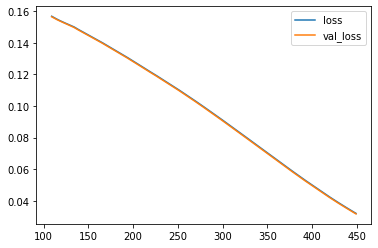

In [8]:
history_df.loc[109:, ['loss', 'val_loss']].plot()
weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]
print('weights: ', weights)
print('biases: ', biases)

In [20]:
# Change 'relu' to 'elu', 'selu', 'swish', sigmoid... or something else
# How different activation functions look like

import tensorflow as tf
import matplotlib.pyplot as plt

# print(tf.__version__)

activation_layer = layers.Activation('max_pool')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)  # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

ValueError: Unknown activation function: max_pool. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.